In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [93]:
df=pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [94]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [95]:
df.shape

(51717, 17)

In [96]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [97]:
#check for missing values
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [98]:
#import pandas_profiling as pf
#pf.ProfileReport(df)

In [99]:
#delete columns that might not be needed
df=df.drop(['url','phone'],axis=1)

In [100]:
#check for duplicate
df.duplicated().sum()

43

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.duplicated().sum()

0

In [103]:
#drop null values
df.dropna(how='any',inplace=True)
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [104]:
df.shape

(23395, 15)

In [105]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [106]:
df=df.rename(columns={'approx_cost(for two people)':'cost',
                     'listed_in(type)':'type',
                     'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [107]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Cleaning the dataset

In [108]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [109]:
df.cost.dtype

dtype('O')

In [110]:
#replacing the ',' and converting to float
df['cost']=df['cost'].apply(lambda x: x.replace(',',''))
df['cost']=df['cost'].astype(float)

In [111]:
print(df['cost'].unique())
print('---'*20)
df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [112]:
#reading the rates
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [113]:
df=df.loc[df.rate != 'NEW']  #getting rid of New

In [114]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [115]:
df['rate']=df.rate.apply(lambda x: x.replace('/5',''))

In [116]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

## Visualizations

In [117]:
#most famous restaurants
chain=df['name'].value_counts()[:20]
chain

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Chung Wah                 45
Subway                    45
Lakeview Milkbar          44
eat.fit                   44
Hammered                  44
Name: name, dtype: int64

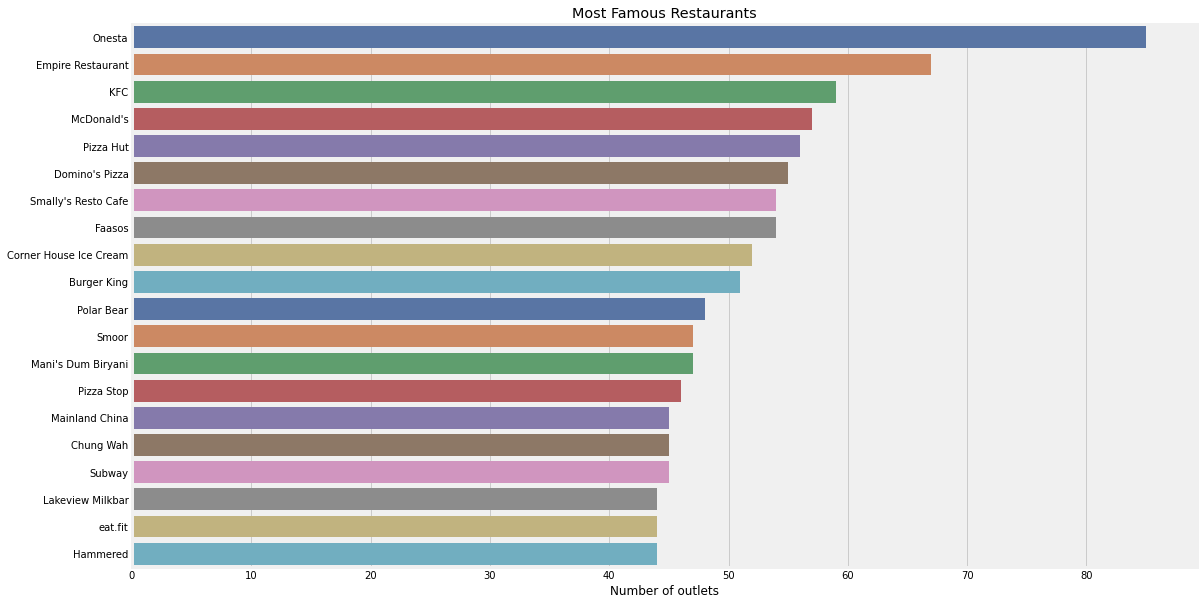

In [118]:
plt.figure(figsize=(17,10))
sns.barplot(x=chain,y=chain.index,palette='deep')
plt.title('Most Famous Restaurants')
plt.xlabel('Number of outlets');

In [119]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [120]:
booking=dict(df.book_table.value_counts())

tables=pd.DataFrame(booking.items(),
                   columns=['request','count'])
tables

,request,count
0,No,17191
1,Yes,6057


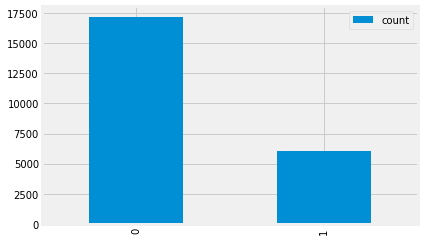

In [121]:
tables.plot(kind='bar');

In [122]:
df.online_order.value_counts()

Yes    16378
No      6870
Name: online_order, dtype: int64

<AxesSubplot:>

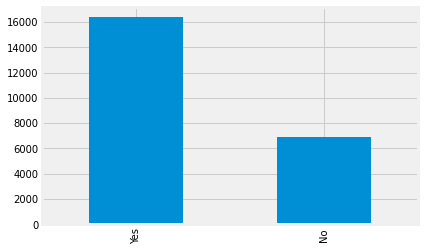

In [123]:
df.online_order.value_counts().plot(kind='bar',
                                   )

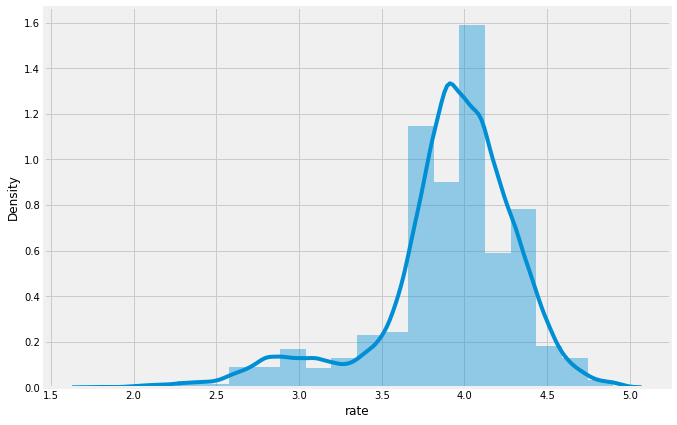

In [124]:
#how are ratings distributed
plt.figure(figsize=(10,7))
sns.distplot(df['rate'], bins=20);

most of the rating are within 3.5 to 4.5

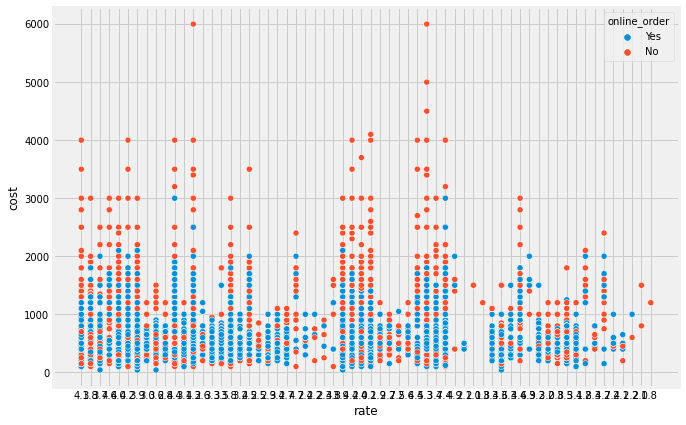

In [125]:
#distribution of rating vs cost parallel with online_order
plt.figure(figsize=(10,7))
sns.scatterplot(x='rate',y='cost',hue='online_order',data=df)
plt.show();

In [126]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [127]:
df.rate.min()

'1.8'

In [128]:
df.rate.max()

'4.9 '

In [129]:
df.rate.dtype

dtype('O')

In [130]:
df.rate=df.rate.astype(float)

### Group the rates together, '1 and 2', '2 and 3', '3 and 4','4 and 5'

In [131]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [132]:
((df['rate']>=2)&(df['rate']<3)).sum()

1179

In [133]:
((df['rate']>=3)&(df['rate']<4)).sum()

10153

In [134]:
(df['rate']>=4).sum()

11911

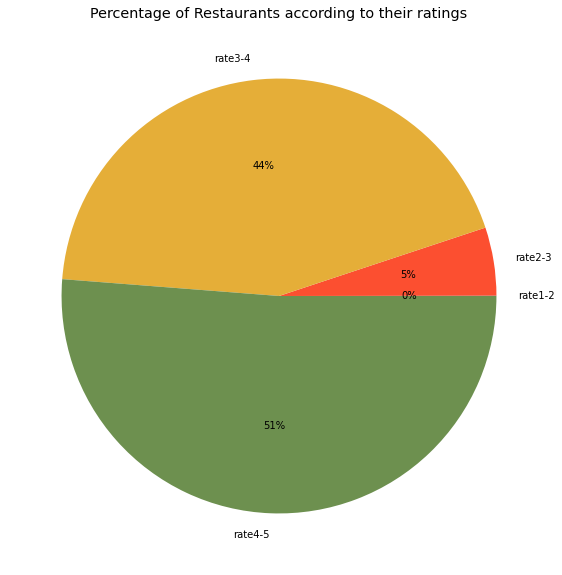

In [135]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2)&(df['rate']<3)).sum(),
        ((df['rate']>=3)&(df['rate']<4)).sum(),
        (df['rate']>=4).sum()]
labels=['rate1-2','rate2-3','rate3-4','rate4-5']
plt.pie(slices,labels=labels,autopct='%1.0f%%',pctdistance=0.6)
fig=plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")
fig.set_size_inches(10,10)
plt.show()

In [136]:
#service types
df['type'].value_counts()

Delivery              10657
Dine-out               8006
Desserts               1364
Cafes                  1066
Drinks & nightlife      879
Buffet                  753
Pubs and bars           523
Name: type, dtype: int64

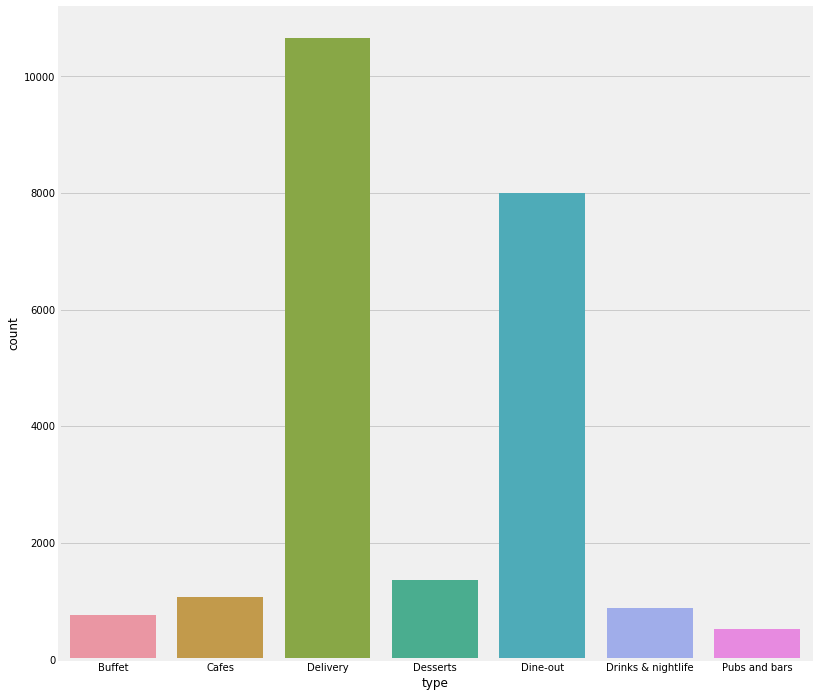

In [137]:
sns.countplot(df['type'])
fig=plt.gcf()
fig.set_size_inches(12,12)

Two main types of services are Delivery and dine out

In [138]:
df.cost.value_counts()

400.0     2478
500.0     2321
600.0     2168
300.0     1688
800.0     1647
1000.0    1218
700.0     1202
1200.0     903
200.0      869
1500.0     841
450.0      719
250.0      697
750.0      651
650.0      644
350.0      553
900.0      524
1300.0     496
1100.0     450
1400.0     447
550.0      440
150.0      371
2000.0     298
1600.0     237
1700.0     229
1800.0     193
3000.0     159
2500.0     143
850.0      122
100.0      120
2100.0      60
1900.0      58
950.0       47
2200.0      39
2800.0      31
3500.0      25
4000.0      24
2400.0      22
1350.0      18
180.0       17
3400.0      13
230.0       10
1250.0       8
40.0         8
1650.0       6
1450.0       5
1050.0       4
2600.0       4
4100.0       4
330.0        4
6000.0       2
120.0        2
3200.0       2
2700.0       2
4500.0       2
2300.0       1
5000.0       1
3700.0       1
Name: cost, dtype: int64

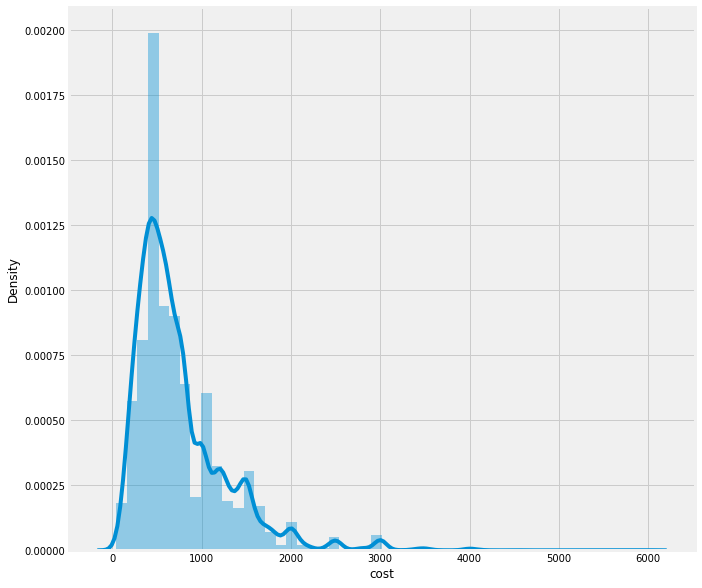

In [139]:
sns.distplot(df['cost'])
fig=plt.gcf()
fig.set_size_inches(10,10)

## Most Liked Dish

In [140]:
df_index=range(df.shape[0])
df_index

range(0, 23248)

In [141]:
import re
#re is regular expression(used fo splitting words)

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in  array_split:
        likes.append(item)

In [142]:
print('count of most liked dish in Bangalore')
favourite_food=pd.Series(likes).value_counts()
favourite_food.head(30)

count of most liked dish in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

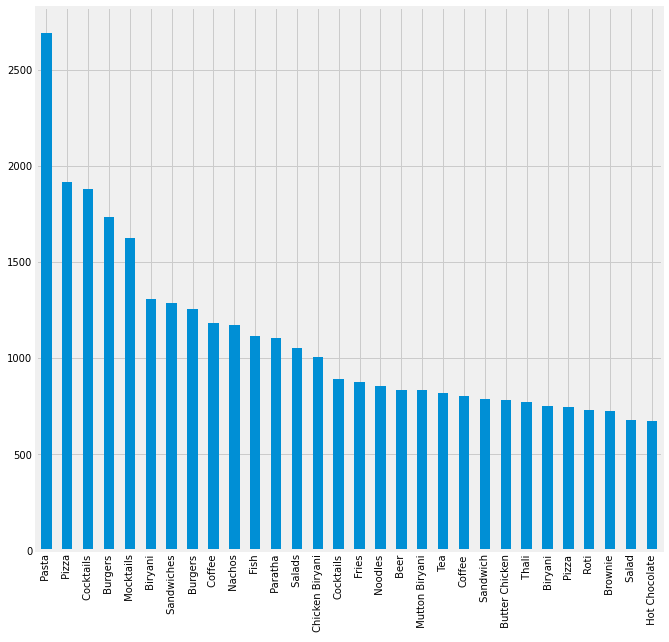

In [143]:
favourite_food.head(30).plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(10,10)

In [144]:
#Restaurants and their counts
rest=df.rest_type.value_counts()[:20]
rest

Casual Dining                 7326
Quick Bites                   5250
Cafe                          2375
Dessert Parlor                1083
Casual Dining, Bar             985
Delivery                       704
Bar                            358
Takeaway, Delivery             342
Bar, Casual Dining             336
Pub                            324
Fine Dining                    311
Casual Dining, Cafe            304
Lounge                         298
Pub, Casual Dining             224
Food Court                     220
Bakery                         166
Cafe, Casual Dining            159
Dessert Parlor, Cafe           143
Beverage Shop, Quick Bites     137
Beverage Shop                  137
Name: rest_type, dtype: int64

Text(0.5, 1.0, 'Popular Restaurant Types')

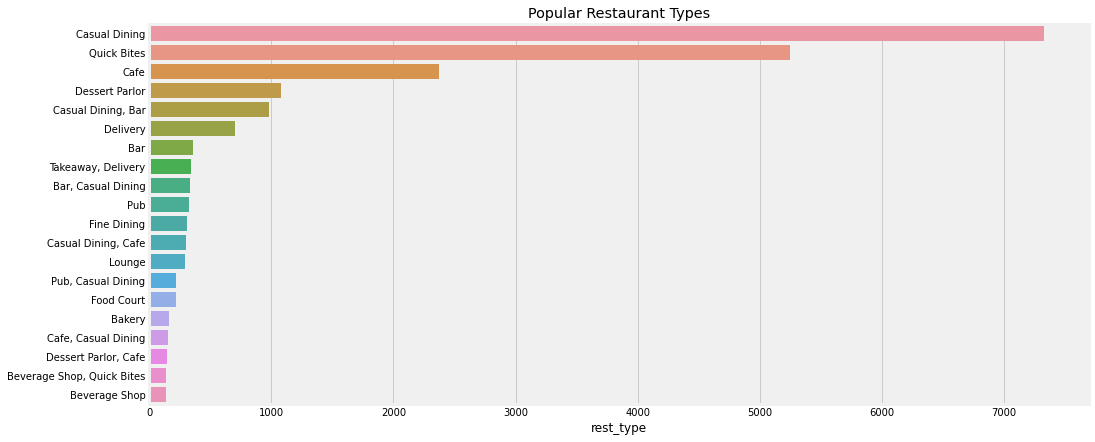

In [145]:
plt.figure(figsize=(15,7))
sns.barplot(rest,rest.index)
plt.title("Popular Restaurant Types")

Casual dining, Quick bites and Cafe are the two most common types.


1. ## Building our Model

In [146]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [147]:
#Converting online_oder to numeric format
df.online_order[df.online_order=='Yes']=1
df.online_order[df.online_order=='No']=0

In [148]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [149]:
df.online_order=pd.to_numeric(df.online_order)
df.online_order.dtype

dtype('int64')

In [150]:
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0

In [151]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

In [152]:
df.book_table=pd.to_numeric(df.book_table)

In [153]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [155]:
df.location=le.fit_transform(df.location)
df.rest_type=le.fit_transform(df.rest_type)
df.cuisines=le.fit_transform(df.cuisines)
df.menu_item=le.fit_transform(df.menu_item)

In [156]:
df.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,1,0,3.8,286,4,20,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",1156,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",5047,Buffet,Banashankari
6,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,1,1,4.6,2556,1,22,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...",1468,600.0,"[('Rated 5.0', 'RATED\n I personally really l...",5047,Cafes,Banashankari
7,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,1,0,4.0,324,1,13,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...",462,700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",5047,Cafes,Banashankari
8,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,1,0,4.2,504,1,13,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...",485,550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",5047,Cafes,Banashankari
9,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,1,0,4.1,402,1,13,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",332,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",5047,Cafes,Banashankari


In [157]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

In [158]:
x=df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [159]:
y=df.rate
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Linear Regressor

In [161]:
lr_model=LinearRegression()

In [162]:
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.2233033484225515

In [163]:
y_preds=lr_model.predict(x_test)

In [164]:
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

0.2233033484225515

### Random Forest

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
r2_score(y_test,y_pred)


0.9049717793664019

In [171]:
## ExtraTree Regressor
from sklearn.ensemble import ExtraTreesRegressor
et_model=ExtraTreesRegressor()
et_model.fit(x_train,y_train)
y_preds=et_model.predict(x_test)
r2_score(y_test,y_preds)

0.9267453116115383

In [173]:
#save the model with pickle
import pickle
pickle.dump(et_model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [174]:
model.score(x_test,y_test)

0.9267453116115383